<div style="text-align: center; font-size: 30pt">MSIN0143 Programming for Business Analytics</div>
<div style="text-align: center; font-size: 24pt; color: black">Group Assignment - Building an Analytical Notebook in Python</div>
<div style="text-align: center; font-size: 23pt; color: blue">Analysis of Corruption Risk Index for Public Procurement Procedures in the UK</div>
<div style="text-align: center; font-size: 20pt">
Group Members:<br>
EK<br>
TC<br>
CP<br>
DG
</div>

# Table of Contents
* [1. Introduction](#1.-Introduction)
    * [1.1 Background](#1.1-Background)
    * [1.2 Description of the data set](#1.2-Description-of-the-data-set)
* [2. Data Collection and Preparation](#2.-Data-Collection-and-Preparation)
* [3. Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
* [4. Feature Engineering](#4.-Feature-Engineering)
* [5. Model Selection and Training](#5.-Model-Selection-and-Training)
    * [5.1 Unsupervised Learning (K-Means Clustering)](#5.1-Unsupervised-Learning-(K-Means-Clustering))
    * [5.2 Regression Model](#5.2-Regression-Model)
    * [5.3 Decision Tree and Random Forest](#5.3-Decision-Tree-and-Random-Forest)
    * [5.4 Neural Network Mode](#5.4-Neural-Network-Mode)
* [6. Performance Evaluation](#6.-Performance-Evaluation)
* [7. Limitations and Restrictions](#7.-Limitations-and-Restrictions)
* [8. Conclusions](#8.-Conclusions)
* [9. References](#9.-References)


In [1]:
# Display full output rather than just the last line of output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. Introduction

### 1.1 Background

Public procurement procedures are highly regulated and structured processes. Typical open tenders begin with calls for tenders or quotation requests, inviting potential suppliers to submit bids. Bidders' proposals are evaluated and ranked by an evaluation committee comprising buyer officials and external experts. A contract award decision is then made, followed by a notice published officially. The process concludes with contract implementation, either through delivery or incomplete termination. <br>

### 1.2 Description of the data set

The dataset in this analysis contains harmonized contract data, with each contract representing a commitment to public spending between a buyer and a supplier. The dataset spans diverse procurement categories. Services include activities like medical treatments, waste collection, and education. Works cover public construction projects such as road building, refurbishments, and landscaping. Supplies, or goods, range from commodities like coffee to office supplies, vehicles, and furniture.   <br>
For this analysis, we focus on the UK partition of the dataset, available from https://data.mendeley.com/datasets/fwzpywbhgw/3, which includes public procurement procedures from 42 countries. This rich dataset provides critical insights into UK spending patterns and procurement diversity.

## 2. Data Collection and Preparation

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import IPython.display as display
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from transformers import BertTokenizer, BertModel
import geopandas as gpd
from sklearn.feature_selection import RFE
import tensorflow as tf
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [5]:
df = pd.read_excel('/home/jovyan/_shared_/finalproject/cleaned_dataset.xlsx', engine='openpyxl')

In [6]:
columns_to_keep = ['persistent_id', 'tender_title', 'tender_proceduretype', 
                   'tender_supplytype', 
                  'tender_isjointprocurement', 'tender_cpvs', 
                   'buyer_masterid', 'buyer_name',
                  'buyer_nuts', 'buyer_mainactivities', 'buyer_buyertype',
                   'bidder_masterid',
                  'bidder_name', 'bid_issubcontracted', 
                  'bid_subcontractedproportion',
                   'bid_isconsortium', 'tender_iseufunded',
                   'bidder_country_e',
                  'tender_year', 'tender_selectionmethod',
                  'tender_description_length', 
                   'tender_personalrequirements_length',
                  'tender_technicalrequirements_length', 
                   'tender_economicrequirements_length',
                  'bid_priceUsd', 'tender_finalpriceUsd',
                  'corr_singleb', 'corr_proc', 'submission_period', 
                   'corr_subm',
                  'decision_period', 'corr_decp', 
                   'corr_buyer_concentration', 'cri'] 

df = df[columns_to_keep]

df.head(5)

,persistent_id,tender_title,tender_proceduretype,tender_supplytype,tender_isjointprocurement,tender_cpvs,buyer_masterid,buyer_name,buyer_nuts,buyer_mainactivities,...,bid_priceUsd,tender_finalpriceUsd,corr_singleb,corr_proc,submission_period,corr_subm,decision_period,corr_decp,corr_buyer_concentration,cri
0,EU_04203305525a3582bb1303e0c5625065ca418c3d67e...,"Provision of Servicing, Maintenance and Upgrad...",RESTRICTED,SERVICES,0,"45331110,50720000,50531200,50531100,45331100,",118ca6fc-1a73-4bab-8ec9-013982bbf68a,Midlothian Council,UKM73,GENERAL_PUBLIC_SERVICES,...,7.619816e+05,5.297080e+06,0,0.0,30,1,196,0,0.070440,0.178407
1,EU_89c67d61da22a008fc91df9a64b65f5fac60a239c2f...,Supply of Haemodialysis Equipment and Consumab...,OPEN,SUPPLIES,0,"33181520,33181100,",d2bfe624-9e79-4776-9eaf-5b8b59e28e45,"Business Services Organisation, Procurement an...",UK,HEALTH,...,2.749749e+06,2.749749e+06,1,0.0,40,1,71,0,0.821882,0.470314
2,EU_003f9b4c3cadc95a119823363ba0852822ee430a3f9...,City of Edinburgh Council Building Energy Mana...,OPEN,SERVICES,0,"71314200,",916fbf91-c5e0-422a-8755-f3e62605dfa6,The City of Edinburgh Council,UKM75,GENERAL_PUBLIC_SERVICES,...,2.676402e+05,2.676402e+05,0,0.0,48,0,71,0,0.000394,0.000066
3,EU_18285fc9678a0d3c7461c3e683702299930c488c4f0...,Tier 2 Family Weight Management Programme.,OPEN,SERVICES,0,"85323000,85140000,85100000,",4c28d2d4-b793-4934-828e-fe48ea45a01d,The City of Bradford Metropolitan District Cou...,UKE41,GENERAL_PUBLIC_SERVICES,...,1.435695e+06,1.435695e+06,0,0.0,274,1,176,0,0.260821,0.210137
4,EU_1e1fc525ae5e548e4569324ccca28323938c713f361...,West Yorkshire Playhouse Multi Disciplinary De...,RESTRICTED,SERVICES,0,"71200000,",b0cd8438-f04a-4eeb-a924-da4c9b500e2d,Leeds City Council,UKE42,OTHER,...,1.521411e+06,1.521411e+06,0,0.0,35,1,184,0,0.017904,0.169651


In [7]:
df = df.dropna(subset=['tender_iseufunded'])
df = df.dropna(subset=['bidder_country_e'])
df = df.dropna(subset=['tender_selectionmethod'])

In [8]:
df['cpv_code_count'] = 
df['tender_cpvs'].apply(lambda x: len([code for code in x.split(',')
            if code.strip()]) if isinstance(x, str) else 0).astype(int)
df['cpv_code_count'].isna().any()

False

## 3. Exploratory Data Analysis

Shape of the dataset: (7179, 35)
First five rows:
                                       persistent_id  \
0  EU_04203305525a3582bb1303e0c5625065ca418c3d67e...   
1  EU_89c67d61da22a008fc91df9a64b65f5fac60a239c2f...   
2  EU_003f9b4c3cadc95a119823363ba0852822ee430a3f9...   
3  EU_18285fc9678a0d3c7461c3e683702299930c488c4f0...   
4  EU_1e1fc525ae5e548e4569324ccca28323938c713f361...   

                                        tender_title tender_proceduretype  \
0  Provision of Servicing, Maintenance and Upgrad...           RESTRICTED   
1  Supply of Haemodialysis Equipment and Consumab...                 OPEN   
2  City of Edinburgh Council Building Energy Mana...                 OPEN   
3         Tier 2 Family Weight Management Programme.                 OPEN   
4  West Yorkshire Playhouse Multi Disciplinary De...           RESTRICTED   

  tender_supplytype  tender_isjointprocurement  \
0          SERVICES                          0   
1          SUPPLIES                          0   


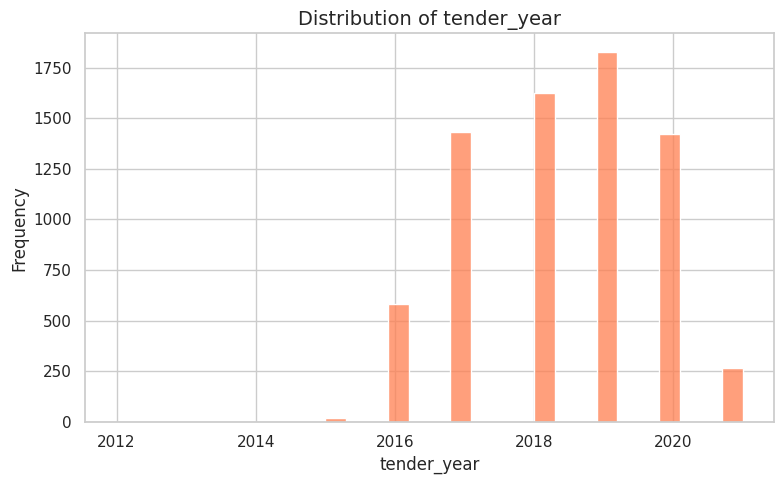

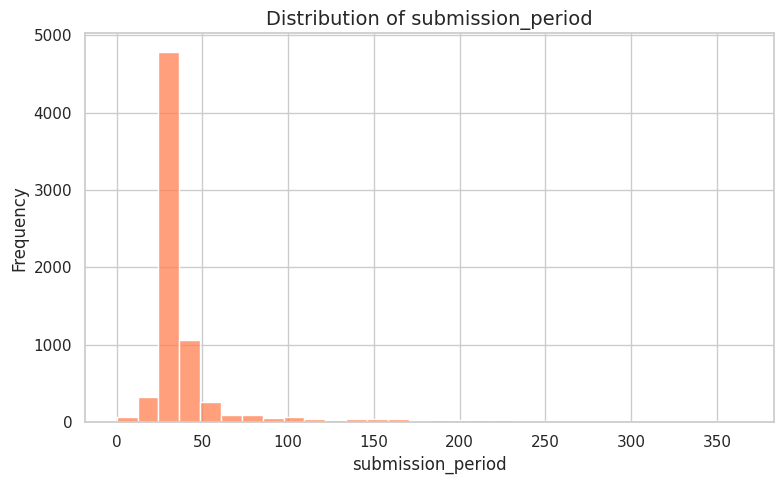

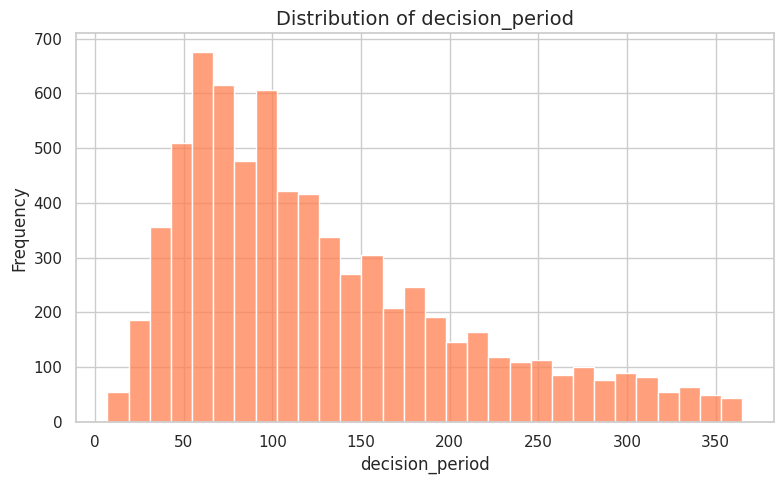

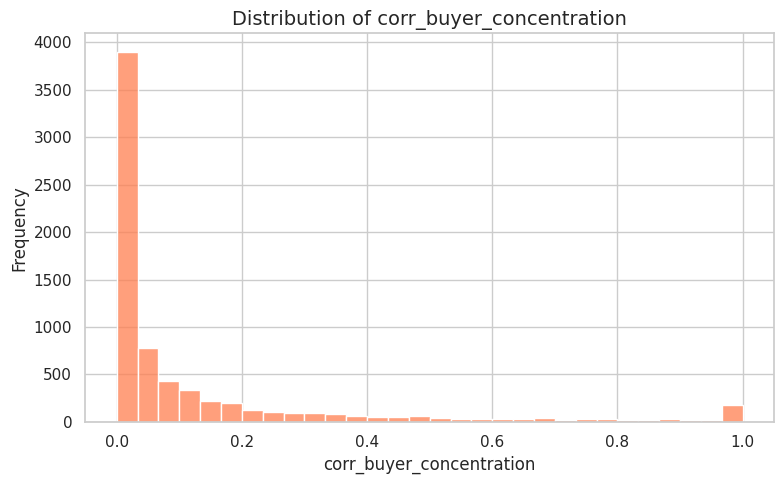

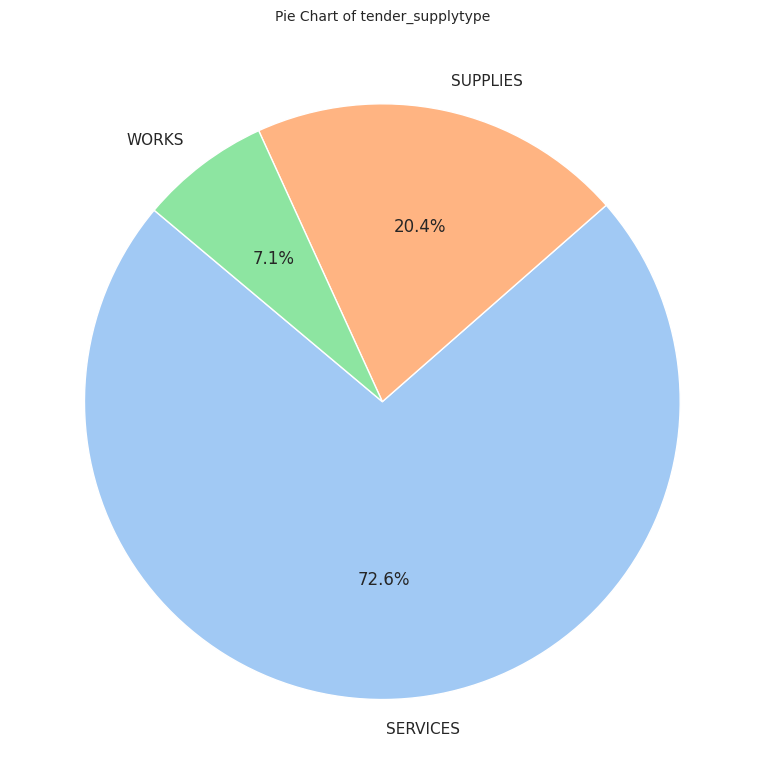

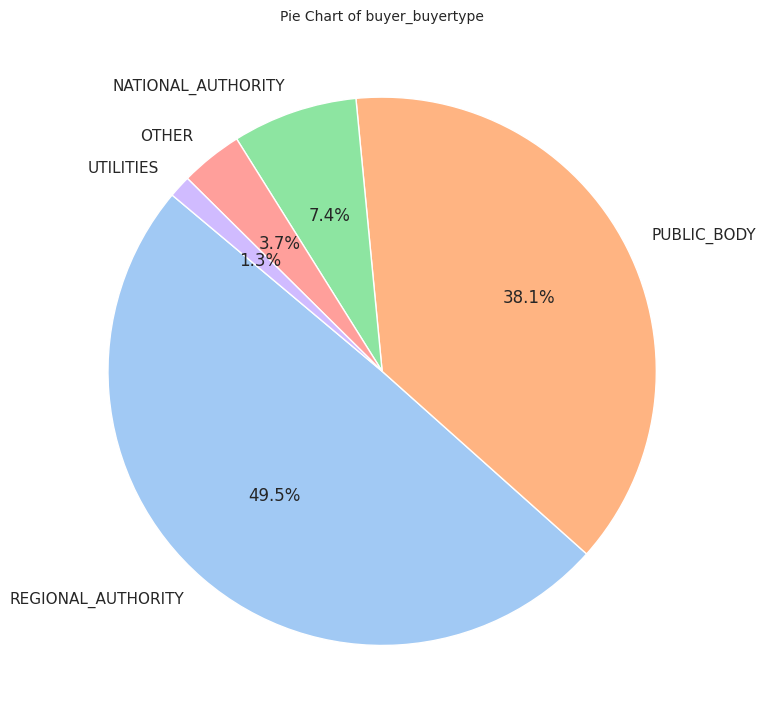

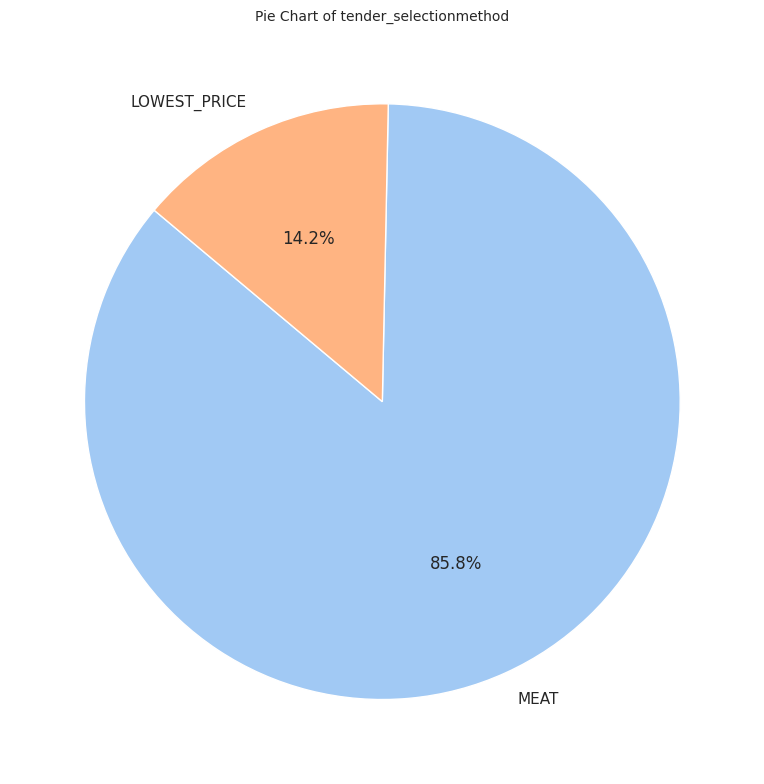

Relationships between variables


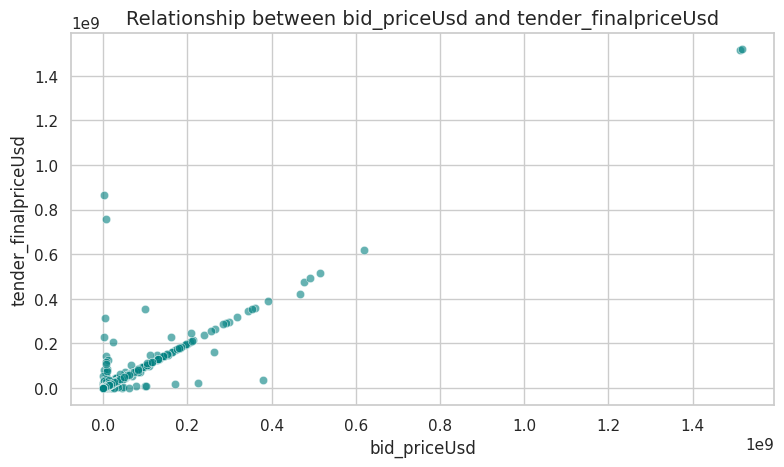

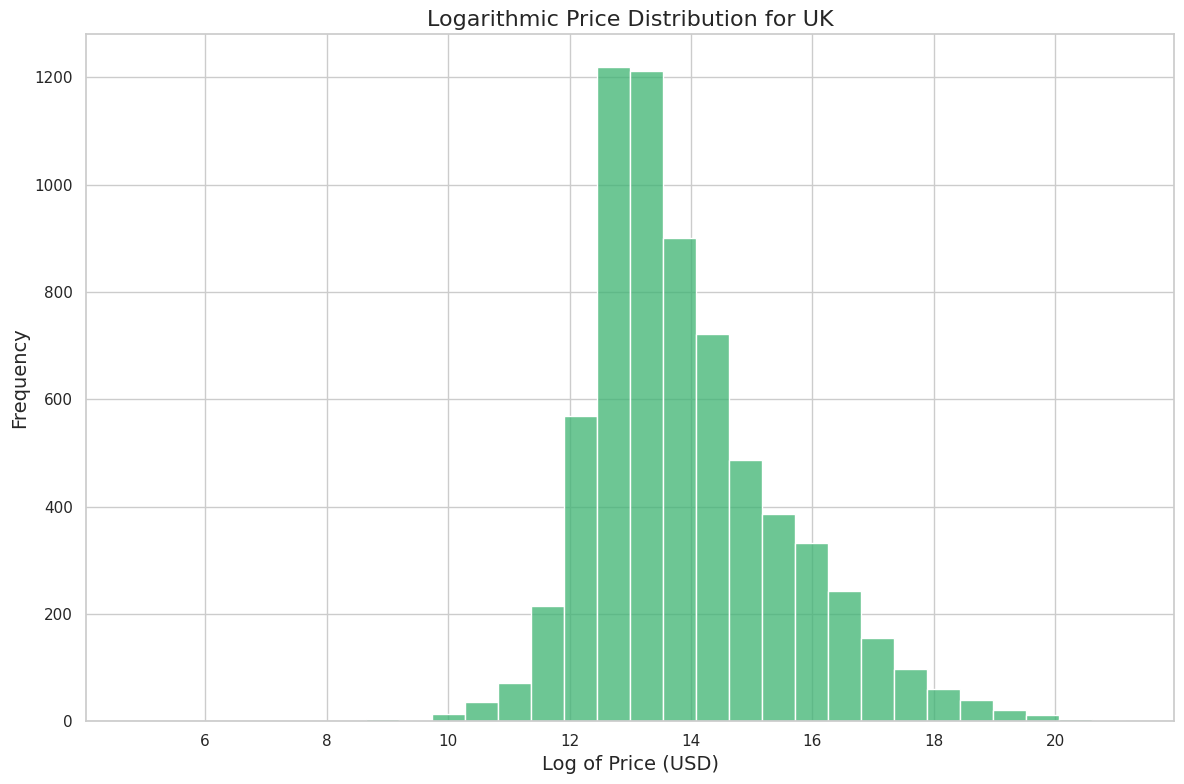

In [9]:
sns.set_theme(style="whitegrid")

df = pd.read_excel("cleaned_dataset.xlsx")

def automated_eda(df):
    """
    Perform exploratory data analysis (EDA) on a given dataset.

    Args:
        df (pd.DataFrame): The dataset to analyze.

    Returns:
        None
    """
    # Dataset overview
    print(f"Shape of the dataset: {df.shape}")
    print('First five rows:')
    print(df.head())
    print('\nColumn information:')
    df.info()
    
    # Descriptive statistics
    print('\nDescriptive statistics')
    print(df.describe())

    print('\nMissing values')
    print(df.isnull().sum())
    
    # Data distribution

    numeric_columns = 
    df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_columns = 
    df.select_dtypes(include=['object', 'category']).columns.tolist()
    excl_columns = {
        'tender_isjointprocurement',
 'bid_issubcontracted',
 'bid_subcontractedproportion',
 'bid_isconsortium',
 'tender_iseufunded',
 'tender_description_length',
 'tender_personalrequirements_length',
 'tender_technicalrequirements_length',
 'tender_economicrequirements_length',
 'bid_priceUsd',
 'tender_finalpriceUsd',
 'corr_singleb',
 'corr_proc',
 'corr_subm',
 'corr_decp', 'cri', 'cpv_code_count'
    }

    for column in numeric_columns:
        if column not in excl_columns:
            plt.figure(figsize=(8, 5))
            sns.histplot(df[column], bins=30, color='coral')
            plt.title(f'Distribution of {column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
            plt.tight_layout()
            plt.show()
    
    df[column] = df[column].fillna('Unknown')

    # Pie charts for categorical columns
    exclude_columns = [
        'persistent_id', 'tender_title', 'tender_cpvs', 'buyer_masterid', 
        'buyer_name',
        'buyer_nuts', 'bidder_masterid', 'bidder_name',
        'bid_subcontractedproportion',
        'bidder_country_e', 'tender_personalrequirements_length',
        'tender_technicalrequirements_length',
        'tender_economicrequirements_length', 'bid_priceUsd', 
        'corr_singleb', 'corr_proc',
        'corr_nocft', 'corr_decp', 'cri', 'corr_subm', 
        "tender_proceduretype", "buyer_mainactivities", 
        "tender_iseufunded", "bid_isconsortium", 
        "bid_issubcontracted"
    ]
    categorical_columns = 
    [col for col in categorical_columns 
     if col not in exclude_columns]

    for column in categorical_columns:
        plt.figure(figsize=(8, 8))
        data = df[column].value_counts(normalize=True).head(5)
        # Top 5 categories
        plt.pie(data, labels=data.index, 
                autopct='%1.1f%%', startangle=140, 
                colors=sns.color_palette('pastel'))
        plt.title(f'Pie Chart of {column}', fontsize=10)
        plt.tight_layout()
        plt.show()

    print('Relationships between variables')

    x_variable = 'bid_priceUsd'
    y_variable = 'tender_finalpriceUsd'
    if x_variable in df.columns and y_variable in df.columns:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[x_variable], 
                        y=df[y_variable], alpha=0.6, 
                        color='teal')
        plt.title(f'Relationship between {x_variable} and {y_variable}', 
                  fontsize=14)
        plt.xlabel(x_variable, fontsize=12)
        plt.ylabel(y_variable, fontsize=12)
        plt.tight_layout()
        plt.show()

    # Converting the boolean values into numerical ones
    df['bid_issubcontracted'] = df['bid_issubcontracted'].replace(
        {'f': 0, 't': 1}).astype('int32')
    df['tender_iseufunded'] = df['tender_iseufunded'].replace(
        {'f': 0, 't': 1}).astype('int32')
    df['bid_isconsortium'] = df['bid_isconsortium'].replace(
        {'f': 0, 't': 1}).astype('int32')

    # Visualize data for top country
    top_countries = df.groupby('bidder_country_e')
    ['tender_finalpriceUsd'].sum().nlargest(1)
    top_country_list = top_countries.index.tolist()

    for country in top_country_list:
        country_data = df[df['bidder_country_e'] == country]
        log_prices = np.log1p(country_data['tender_finalpriceUsd'])
        plt.figure(figsize=(12, 8))
        sns.histplot(log_prices, bins=30, color='mediumseagreen')
        plt.title(f'Logarithmic Price Distribution for {country}', 
                  fontsize=16)
        plt.xlabel('Log of Price (USD)', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.tight_layout()
        plt.show()

# Call the function
automated_eda(df)

In [10]:
#Tender activity dramatically increased after 2016, peaking in 2018–2020.

#Submission periods are usually short (<50 days), with occasional 
#extended durations.

#Although decision timeframes tend to be shorter, many cases
#take an extended time. 

#Buyer concentration is usually low, with a 
#few highly concentrated outliers. 

#Procurement is predominantly service-oriented. 

#Regional and public institutions represent the most buyers,
#with minimal involvement from other bodies. 

#MEAT is the most popular tender selection method, emphasizing 
#quality over cost.

#Bid and final prices correlate positively, with outliers 
#suggesting potential corruption. 

#Logged prices exhibit an almost normal distribution. 

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

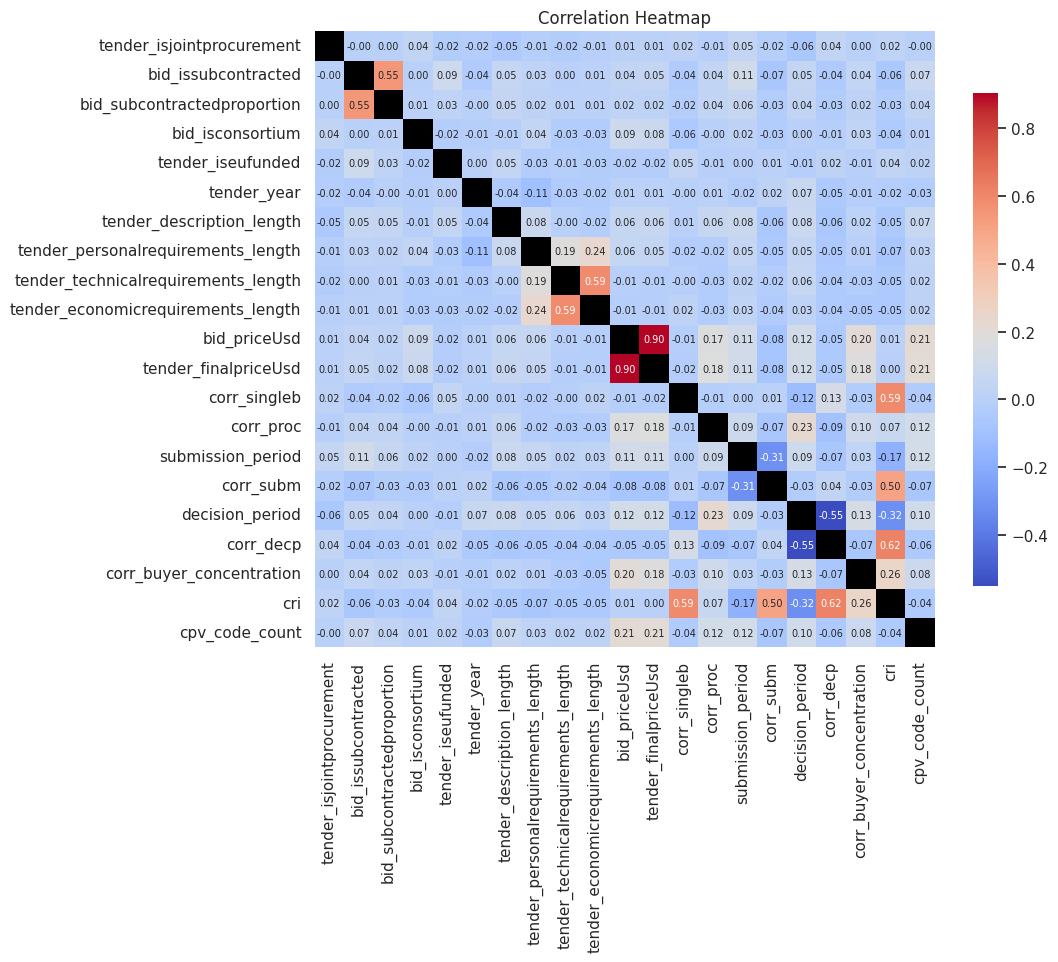

In [10]:
# Correlation matrix
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()

mask = np.eye(corr_matrix.shape[0], dtype=bool)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask, 
            cbar_kws={"shrink": 0.8}, annot_kws = {'size': 7})
for i in range(corr_matrix.shape[0]):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, color='black', lw=0))
plt.title("Correlation Heatmap")
plt.show()

In [37]:
# The heatmap above illustrates the correlations between various features 
#in the dataset, including the target variable CRI (Composite Risk Index).
# Strong correlations between features such as tender_finalpriceUSD 
#and bid_priceUSD signal potential multicollinearity issues, which 
#is critical to ensure that models like regression produce unbiased 
#coefficients.

/tmp/ipykernel_1756/2501591381.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlations Related to Composite Risk Index (CRI)')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'cri'),
  Text(1.5, 0, 'corr_singleb'),
  Text(2.5, 0, 'corr_proc'),
  Text(3.5, 0, 'corr_subm'),
  Text(4.5, 0, 'corr_decp'),
  Text(5.5, 0, 'corr_buyer_concentration')])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'cri'),
  Text(0, 1.5, 'corr_singleb'),
  Text(0, 2.5, 'corr_proc'),
  Text(0, 3.5, 'corr_subm'),
  Text(0, 4.5, 'corr_decp'),
  Text(0, 5.5, 'corr_buyer_concentration')])

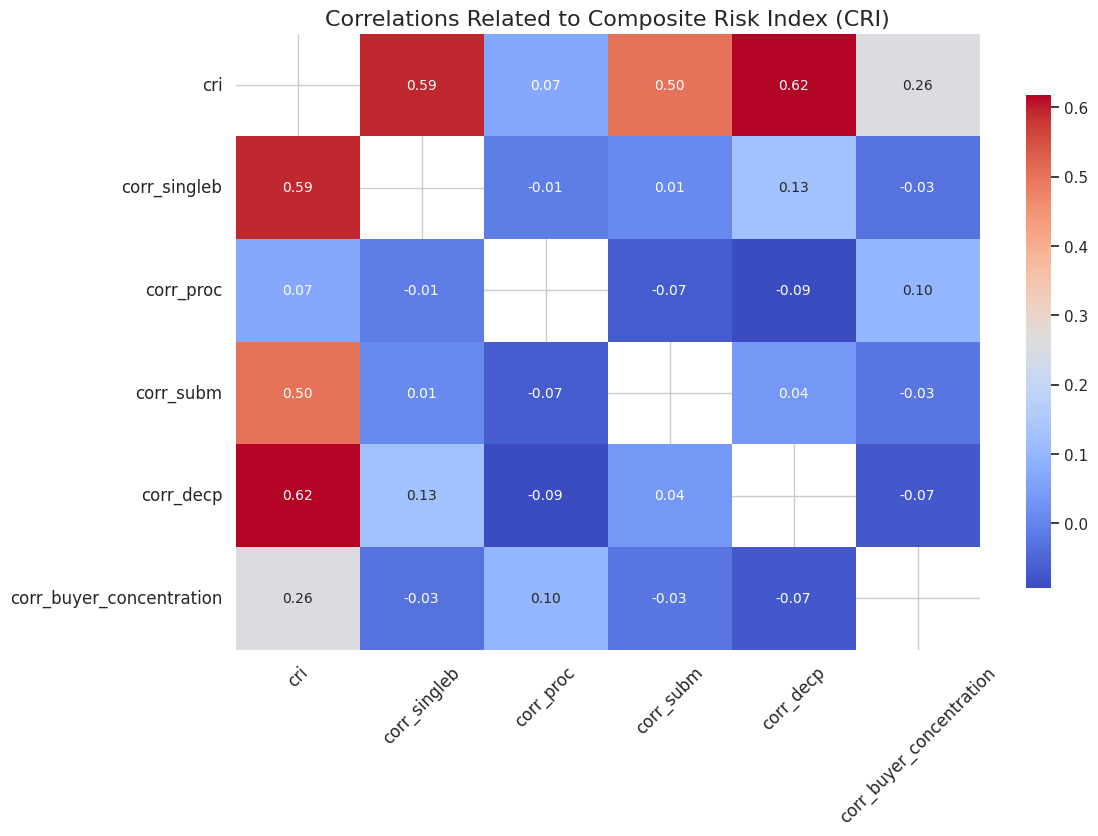

In [11]:
corr_matrix = df.corr()

mask = np.eye(corr_matrix.shape[0], dtype=bool)

# variables related to CRI and corruption
cri_vars = ["cri", "corr_singleb", "corr_proc", "corr_subm", "corr_decp", 
            "corr_buyer_concentration"]
corr_focus = corr_matrix.loc[cri_vars, cri_vars]

plt.figure(figsize=(12, 8))
sns.heatmap(corr_focus, annot=True, fmt=".2f", cmap="coolwarm", 
            mask=np.eye(len(cri_vars)), 
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})
plt.title("Correlations Related to Composite Risk Index (CRI)", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [39]:
# The heatmap above highlights the relationships between CRI and 
#its derived variables which are components of the CRI calculation.
# While these features are not suitable for predictive modeling due to 
#being linked to the target variable, analysis is still critical in
# understanding which procurement practices contribute to corruption.

<Axes: >

Text(0.02, 0.1, 'Top Countries:\nUK: $4.56e+10\nNL: $1.39e+08\nDE: $1.08e+08')

Text(0.5, 1.0, 'Monetary Value Distribution')

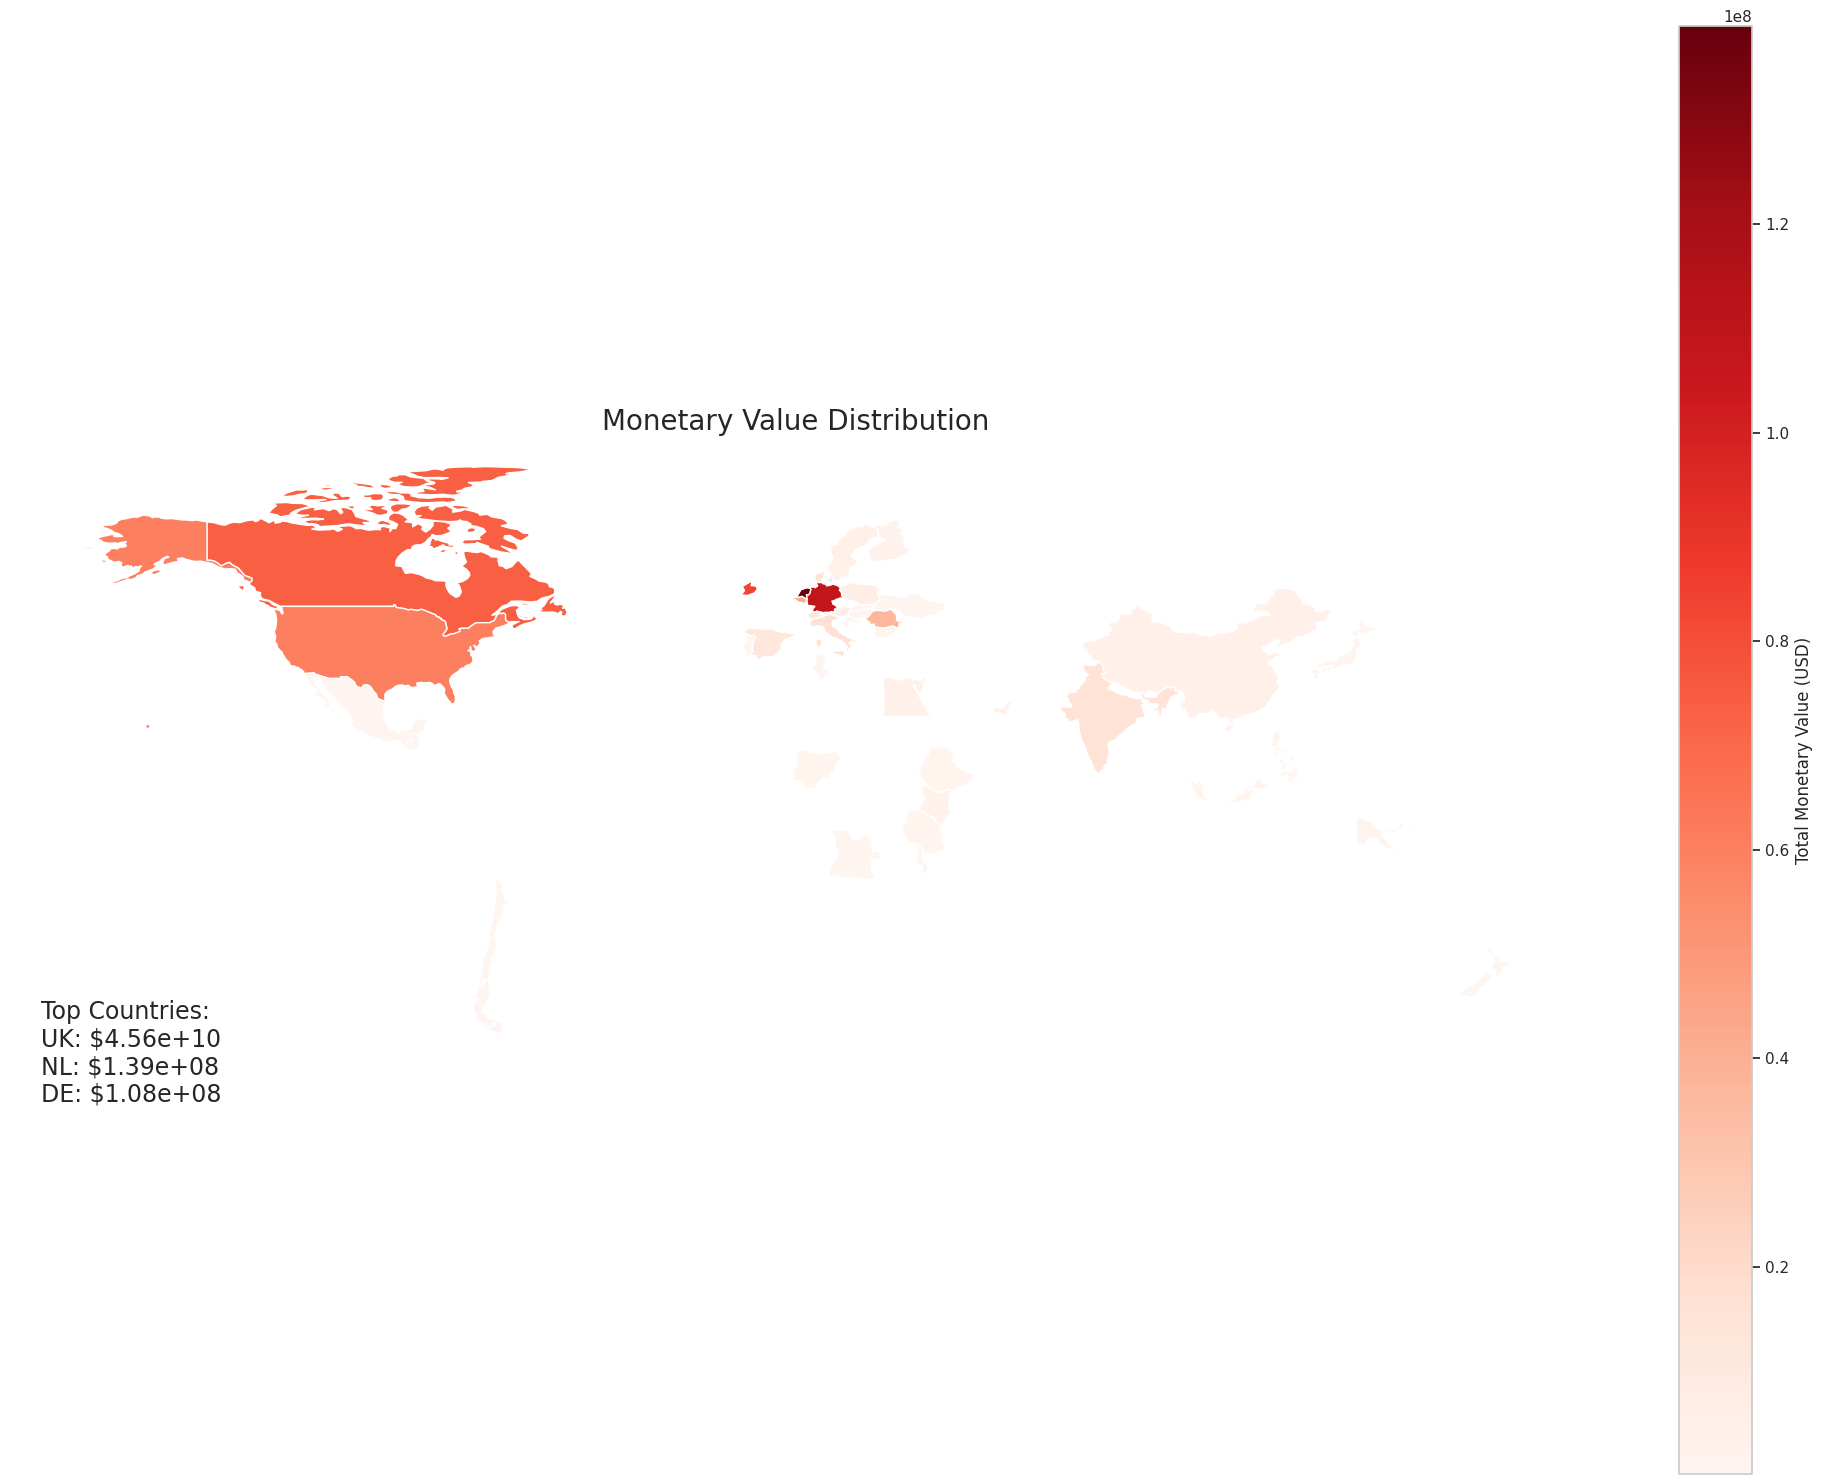

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world shapefile
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Aggregate data
aggregated = df.groupby('bidder_country_e').agg(
    count=('bidder_country_e', 'size'),
    total_usd_sum=('tender_finalpriceUsd', 'sum')
).reset_index()

# Merge with world shapefile
merged = world.merge(aggregated, left_on='ISO_A2', 
                     right_on='bidder_country_e', how='left')

# Identify top 3 countries
top_countries = aggregated.nlargest(3, 'total_usd_sum')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.plot(
    column='total_usd_sum',
    cmap='Reds',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Total Monetary Value (USD)", 
                 'orientation': "vertical"}
)

# Add legends for top 3 countries
legend_text = "\n".join(
    [f"{row['bidder_country_e']}: ${row['total_usd_sum']:.2e}" for _, 
     row in top_countries.iterrows()]
)
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(
    0.02, 0.1,  # Position in figure coordinates
    f"Top Countries:\n{legend_text}",
    transform=ax.transAxes,
    fontsize=17,
    verticalalignment='top',
    bbox=props
)

# Add title and clean axes
ax.set_title("Monetary Value Distribution", fontsize=20)
ax.set_axis_off()

plt.tight_layout()
plt.show()


## 4. Feature Engineering

In [13]:
# Feature engineering transforms raw data into meaningful features, 
# helping models and analyses uncover patterns and make 
#better predictions or insights.

# These new features can help to capture business logic, enhance 
#interpretability, and improve model performance.


# Compute the sum of the length columns
df['total_requirements_length'] = (
    df['tender_description_length'] +
    df['tender_personalrequirements_length'] +
    df['tender_technicalrequirements_length'] +
    df['tender_economicrequirements_length']
)
df['total_requirements_length'].isna().any()
# Encode 'tender_selectionmethod' as binary
df['tender_selectionmethod_binary'] = df['tender_selectionmethod'].apply(
    lambda x: 0 if x == 'MEAT' else 1 if x == 'LOWEST_PRICE' else None
)

columns_to_convert = ['tender_isjointprocurement', 'bid_issubcontracted', 
                      'bid_isconsortium', 'tender_iseufunded']

# Replace 't' with 1 and 'f' with 0 in the specified columns
df[columns_to_convert] = df[columns_to_convert].replace({'t': 1, 'f': 0})

# Price per Requirement Length
df['price_per_requirement'] = df['tender_finalpriceUsd'] /
df['total_requirements_length']

# Price Risk Index
df['price_risk_index'] = df['tender_finalpriceUsd'] * df['cri']

# Requirement Density
df['requirement_density'] = df['cpv_code_count'] / 
df['total_requirements_length']

# Price Classification
df['price_category'] = pd.qcut(df['tender_finalpriceUsd'], 
                               q=3, labels=['Low', 'Medium', 'High'])

# CRI Risk Group
def classify_risk(cri):
    if cri <= 0.3:
        return 'Low'
    elif cri <= 0.6:
        return 'Medium'
    else:
        return 'High'

df['risk_group'] = df['cri'].apply(classify_risk)

# Calculate the difference between final price and bid price
df['price_difference'] = df['tender_finalpriceUsd'] - df['bid_priceUsd']

False

## 5. Model Selection and Training

### 5.1 K-Means Clustering

We will use k-means clustering to understand better how tenders can be grouped into three levels. K-means is used for its simplicity and velocity computing large datasets. The features used in this analysis are <i>CRI - Corruption Risk Index</i> and <i>tender_final_priceUsd</i>. We want to identify:
<br>
    <br><b>Cluster 1:</b> Low-risk and low-priced tenders.
    <br><b>Cluster 2:</b> Medium-risk and medium-priced tenders.
    <br><b>Cluster 3:</b> High-risk and high-priced tenders.

CRI provides a way to assess how risky a particular tender is regarding corruption, influencing whether the organization will proceed with a tender or how they might evaluate tenders. By including CRI, we are segmenting tenders based on the likelihood of corruption, an essential factor for decision-making. 
 
Tender Price is among the most critical variables in any procurement or bidding process. It indicates the cost of the tender, which directly impacts the organization’s budget, the project's feasibility, and the financial decisions. 


In [14]:
# Select relevant columns for clustering
df_kmeans = df.copy(deep=True)
features = df_kmeans[[ 
   'cri', 'tender_finalpriceUsd']]   

# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Apply K-Means Clustering
k = 3 #number of clusters
kmeans = KMeans(n_clusters=k, n_init=10)

df_kmeans['Cluster'] = kmeans.fit_predict(features_normalized)

# Check the distribution of clusters in the dataset
cluster_counts = df_kmeans.groupby('Cluster').size().reset_index
(name='Count')

display.display(cluster_counts)
df

,Cluster,Count
0,0,2489
1,1,4671
2,2,19


,persistent_id,tender_title,tender_proceduretype,tender_supplytype,tender_isjointprocurement,tender_cpvs,buyer_masterid,buyer_name,buyer_nuts,buyer_mainactivities,...,cri,cpv_code_count,total_requirements_length,tender_selectionmethod_binary,price_per_requirement,price_risk_index,requirement_density,price_category,risk_group,price_difference
0,EU_04203305525a3582bb1303e0c5625065ca418c3d67e...,"Provision of Servicing, Maintenance and Upgrad...",RESTRICTED,SERVICES,0,"45331110,50720000,50531200,50531100,45331100,",118ca6fc-1a73-4bab-8ec9-013982bbf68a,Midlothian Council,UKM73,GENERAL_PUBLIC_SERVICES,...,0.178407,5,4022,0,1317.026442,9.450340e+05,0.001243,High,Low,4.535099e+06
1,EU_89c67d61da22a008fc91df9a64b65f5fac60a239c2f...,Supply of Haemodialysis Equipment and Consumab...,OPEN,SUPPLIES,0,"33181520,33181100,",d2bfe624-9e79-4776-9eaf-5b8b59e28e45,"Business Services Organisation, Procurement an...",UK,HEALTH,...,0.470314,2,209,1,13156.692322,1.293244e+06,0.009569,High,Medium,0.000000e+00
2,EU_003f9b4c3cadc95a119823363ba0852822ee430a3f9...,City of Edinburgh Council Building Energy Mana...,OPEN,SERVICES,0,"71314200,",916fbf91-c5e0-422a-8755-f3e62605dfa6,The City of Edinburgh Council,UKM75,GENERAL_PUBLIC_SERVICES,...,0.000066,1,3410,0,78.486872,1.757610e+01,0.000293,Low,Low,0.000000e+00
3,EU_18285fc9678a0d3c7461c3e683702299930c488c4f0...,Tier 2 Family Weight Management Programme.,OPEN,SERVICES,0,"85323000,85140000,85100000,",4c28d2d4-b793-4934-828e-fe48ea45a01d,The City of Bradford Metropolitan District Cou...,UKE41,GENERAL_PUBLIC_SERVICES,...,0.210137,3,329,0,4363.815430,3.016924e+05,0.009119,Medium,Low,0.000000e+00
4,EU_1e1fc525ae5e548e4569324ccca28323938c713f361...,West Yorkshire Playhouse Multi Disciplinary De...,RESTRICTED,SERVICES,0,"71200000,",b0cd8438-f04a-4eeb-a924-da4c9b500e2d,Leeds City Council,UKE42,OTHER,...,0.169651,1,519,0,2931.427612,2.581083e+05,0.001927,Medium,Low,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7174,EU_fc48f6624f7cf2c6dcb93d4d58012dcfa39fb9a2439...,UWS: Provision of a Supported Social Learning ...,OPEN,SERVICES,0,"80420000,",312f3c54-b313-4360-a33c-f4594657dd75,University of the West of Scotland,UKM83,EDUCATION,...,0.289902,1,828,0,4555.318048,1.093452e+06,0.001208,High,Low,0.000000e+00
7175,EU_fcb78183de450caa9c5d4e52913e5aa7d6038f2a64d...,CivTech 5 Challenge 4 â€” How can Digital Help...,OPEN,SERVICES,0,"48931000,72600000,72200000,79400000,72000000,4...",041a8d5d-ce4d-456e-b9d4-50019a8b539b,Scottish Government,UKM,GENERAL_PUBLIC_SERVICES,...,0.166908,14,1336,0,108.137001,2.411336e+04,0.010479,Low,Low,0.000000e+00
7176,EU_fd3d31c0e4829891e293daa019efb9dfd3b530f5a6a...,Highways England Staff Magazine 2020,OPEN,SERVICES,0,"79970000,",26e228d9-3d4c-4d16-910f-ec3ea14c5504,Highways England,UK,GENERAL_PUBLIC_SERVICES,...,0.166780,1,810,0,406.018242,5.484963e+04,0.001235,Low,Low,4.028401e+04
7177,EU_fe5bb8988569fb54826cf3af3d8802d19ef1e1d235f...,Scottish Government Environmental Data and Sus...,OPEN,SERVICES,0,"71313450,90700000,90710000,90711000,90712000,9...",041a8d5d-ce4d-456e-b9d4-50019a8b539b,Scottish Government,UKM,GENERAL_PUBLIC_SERVICES,...,0.167220,14,4154,0,79.737805,5.538835e+04,0.003370,Low,Low,0.000000e+00


<Figure size 1000x600 with 0 Axes>

(-0.25, 1.0)

Text(0.5, 1.0, 'K-Means Clustering Visualization')

Text(0.5, 0, 'CRI')

Text(0, 0.5, 'Tender Final Price (USD)')

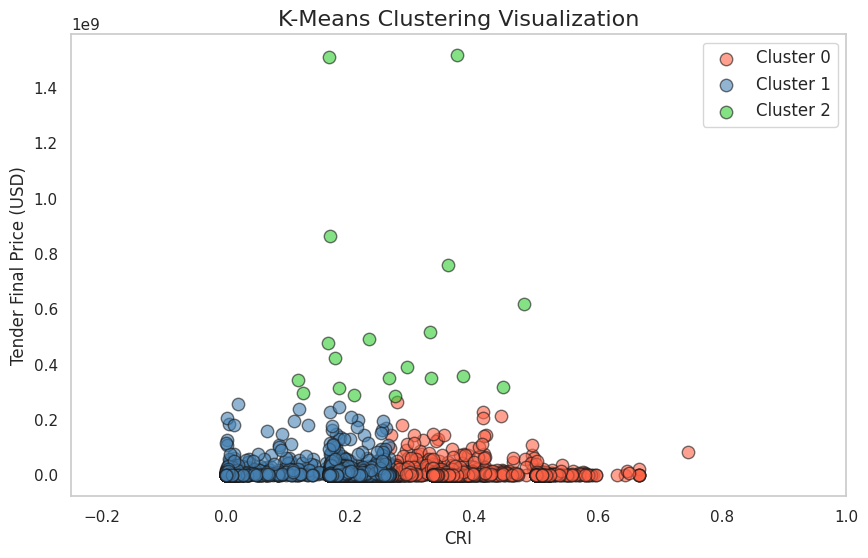

In [15]:
# Scatter plot: Visualize clusters (using cri and tender_finalpriceUsd)

# Set figure size
plt.figure(figsize=(10, 6))

# Define a color map to make clusters stand out more
colors = ['#FF6347', '#4682B4', '#32CD32']  # Red, Blue, Green

# Plot each cluster with a distinct color and marker
for cluster in range(kmeans.n_clusters):
    cluster_data = df_kmeans[df_kmeans['Cluster'] == cluster]
    plt.scatter(
        cluster_data['cri'],
        cluster_data['tender_finalpriceUsd'],
        label=f'Cluster {cluster}',
        color=colors[cluster],  # Use different colors for each cluster
        alpha=0.6,  # Make points semi-transparent
        edgecolors='k',  # Black edges around the points
        s=80  # Increase marker size
    )

# Set x-axis and y-axis limits
plt.xlim(-0.25, 1)  # Set x-axis range from -0.25 to 1

# Add title and labels
plt.title('K-Means Clustering Visualization', fontsize=16)
plt.xlabel('CRI', fontsize=12)
plt.ylabel('Tender Final Price (USD)', fontsize=12)

# Add legend to identify clusters
plt.legend(loc='upper right', fontsize=12)

# Remove grid for a cleaner look
plt.grid(False)

# Display the plot
plt.show()

<b>Conclusion:</b> Using this unsupervised learning method, we can identify that two groups are predominant in our dataset <font color='red'>RED</font> and <font color='blue'>BLUE</font>. The <font color='green'>GREEN</font> group seems to be an outlier and the cause of it is the final Price.

In [16]:
# Filter the DataFrame for cluster 2
cluster_2_df = df_kmeans[df_kmeans['Cluster'] == 2]

# Select only the relevant columns
cluster_2_df_filtered = cluster_2_df[['persistent_id', 
                                      'tender_finalpriceUsd', 
                                      'cri',
                                      'Cluster']]


# Display the filtered DataFrame
display.display(cluster_2_df_filtered)

,persistent_id,tender_finalpriceUsd,cri,Cluster
83,EU_184199b572b5c5aba854387920b59fd0c3d2e5efbf7...,6.202939e+08,0.480143,2
893,EU_2e1f4c6131170f77887c2bfe4b02f4477db1f0d0101...,2.978399e+08,0.123480,2
1193,EU_64ca088eb8b1397535a5ce43d2ec71f2cb8f92b3eaf...,7.593003e+08,0.357978,2
1733,EU_c75136f7e2da6b884b2ae60cb6c46c246103bace2ed...,4.223306e+08,0.175862,2
1980,EU_f64318fa964e4f16dd0606a7aff898d1269d6db2680...,1.512968e+09,0.166651,2
2090,EU_075083ffa3b4e1fec536a44500b6bc76c3fcbd0df2a...,8.648591e+08,0.166993,2
2650,EU_5ca84b30e5a1de619bcf34aa0366b00a6ebc6e05c5e...,3.433209e+08,0.115832,2
2829,EU_7621d616b06e1c0c3fa6faff56d8bd3b3d08dc5e85f...,3.597320e+08,0.382927,2
3214,EU_b61eaca9c4fbcee6ad213a7d4e6e2e93c727c2fd4e2...,4.765197e+08,0.164200,2
3359,EU_cbccbff35955c3bf4d8217cd8c29eeecc4a80c7849e...,3.532201e+08,0.330631,2


### 5.2 Regression Model and Gradient Boosting Regressor

The goal is to predict the CRI using relevant features and evaluate the model's generalization ability. A heatmap of feature correlations with the CRI was generated to identify relationships. The selected features underwent F-tests to quantify their linear relationship with the target. Further refinement was done using RFE, which ranked features based on their contribution to model performance. 
 
Linear Regression was chosen as a baseline model for its simplicity and ability to reveal linear relationships and establish a benchmark. A Gradient Boosting Regressor was implemented to improve this and capture the non-linear interactions in the data. 
 
R-squared values of 0.067 (training) and 0.078 (testing) indicate low explanatory power, suggesting that linear relationships are insufficient. 

Improved r-squared values (0.365 for training and 0.325 for testing) suggest the model captures non-linear patterns but still lacks robustness.

Overall, results suggest that exploring advanced models like Random Forests or Neural Networks for better predictive accuracy is needed.

/tmp/ipykernel_1756/2018730898.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation of Features with CRI')

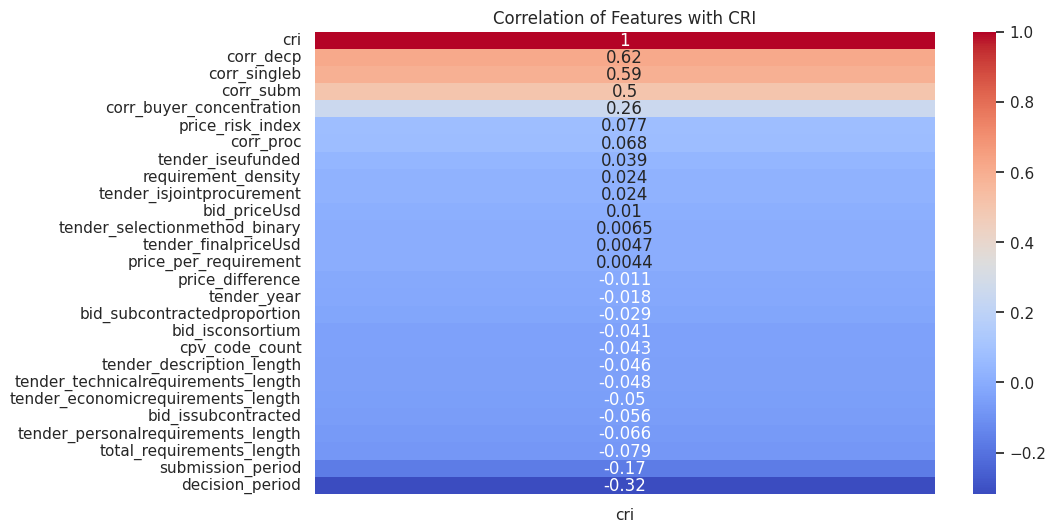

In [17]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize correlations with CRI
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['cri']].sort_values(by='cri', 
                                                    ascending=False), 
            annot=True, 
            cmap='coolwarm')
plt.title("Correlation of Features with CRI")
plt.show()

In [18]:
# Define the predictors (X) and target (y)  # 
X = df[['corr_decp', 'corr_singleb','corr_subm', 
        'corr_buyer_concentration', 
        'total_requirements_length',
        'price_risk_index',
       'requirement_density',
        'corr_proc',
        'tender_iseufunded',
        'price_difference']]

y = df['cri']

# Perform ANOVA F-test for feature importance
f_values, p_values = f_regression(X, y)

# Combine feature names with F-values and P-values
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
}).sort_values(by='F-Value', ascending=False)

print(feature_importance)

                     Feature      F-Value        P-Value
0                  corr_decp  4412.440299   0.000000e+00
1               corr_singleb  3894.216435   0.000000e+00
2                  corr_subm  2421.946914   0.000000e+00
3   corr_buyer_concentration   502.569765  1.216176e-107
4  total_requirements_length    45.087997   2.027681e-11
5           price_risk_index    43.365652   4.861519e-11
7                  corr_proc    33.825030   6.288780e-09
8          tender_iseufunded    10.845402   9.952079e-04
6        requirement_density     4.138453   4.195615e-02
9           price_difference     0.897069   3.436007e-01


In [19]:
# Initialize model
model = LinearRegression()

# Apply Recursive Feature Elimination
# Model-based feature selection that uses the predictive power of 
#a specific model to rank features.
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)

# Show selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

RFE(estimator=LinearRegression(), n_features_to_select=5)

Selected Features: Index(['corr_decp', 'corr_singleb', 'corr_subm', 'corr_buyer_concentration',
       'corr_proc'],
      dtype='object')


In [20]:
# Select predictors and target
predictors = [
    'corr_buyer_concentration', 
    'total_requirements_length', 
    'price_risk_index', 
    'requirement_density', 
    'tender_selectionmethod_binary'
]
X = df[predictors]
y = df['cri']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MSE: {mse_train}, R²: {r2_train}")
print(f"Test MSE: {mse_test}, R²: {r2_test}")

LinearRegression()

Training MSE: 0.013796244960777153, R²: 0.0679841794703041
Test MSE: 0.01318610693510593, R²: 0.07899942773862001


In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# split your data into training and testing sets.

# Split the predictors (X) and the target variable (y) 
#into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split
(X, y, test_size=0.2, random_state=42)
gbr_model = GradientBoostingRegressor
(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# predict the target values for both the training and testing datasets
y_pred_train = gbr_model.predict(X_train)
y_pred_test = gbr_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MSE: {mse_train}, R²: {r2_train}")
print(f"Test MSE: {mse_test}, R²: {r2_test}")

GradientBoostingRegressor(random_state=42)

Training MSE: 0.009300712911195047, R²: 0.36586045265800804
Test MSE: 0.009866877735856204, R²: 0.3250168956425623


Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residual Plot')

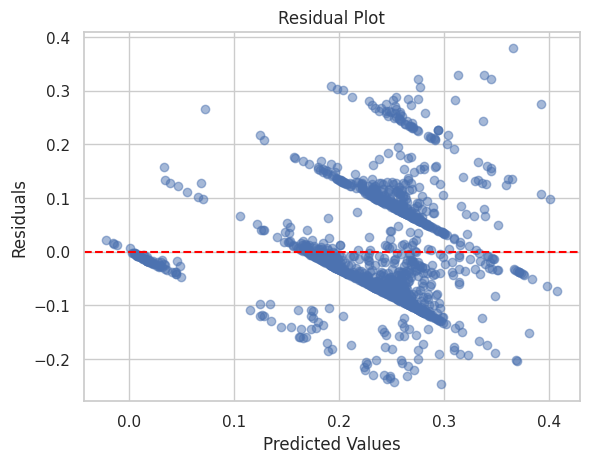

In [22]:
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### 5.3 Decision Tree and Random Forest

With an R2 of 0.68, Random Forest explains 68% of the variance in CRI. The model's efficacy is further supported by an MSE of 0.005. 

The feature importance analysis’s key findings showed that the most important predictors, which accounted for most of the variance, were decision_period and submission_period. This implies that timing-related variables have a significant impact on CRI forecasts.

RandomForestRegressor(random_state=42)

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 0, 'Feature Importance')

Text(0.5, 1.0, 'Feature Importance in New Random Forest Model')

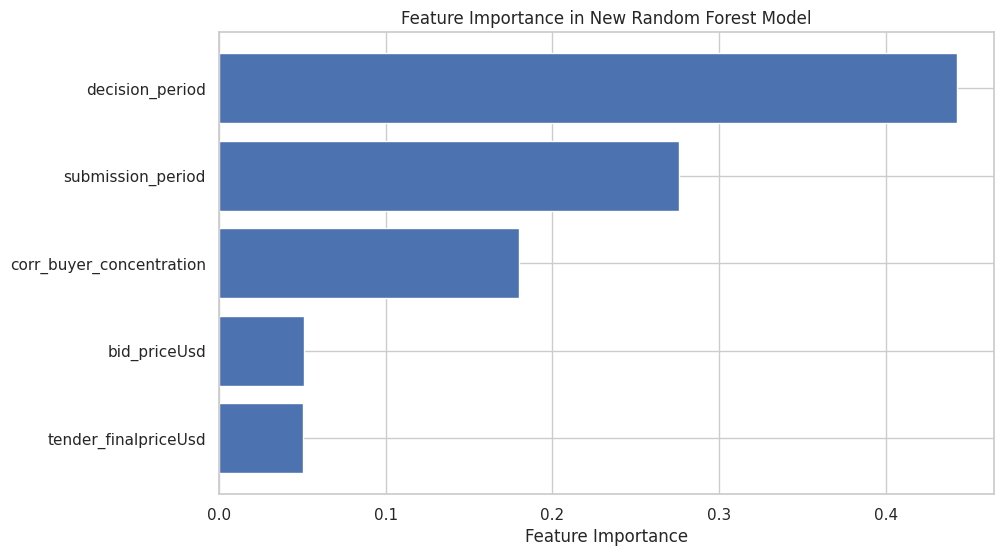

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Actual CRI')

Text(0, 0.5, 'Predicted CRI')

Text(0.5, 1.0, 'Actual vs Predicted CRI')

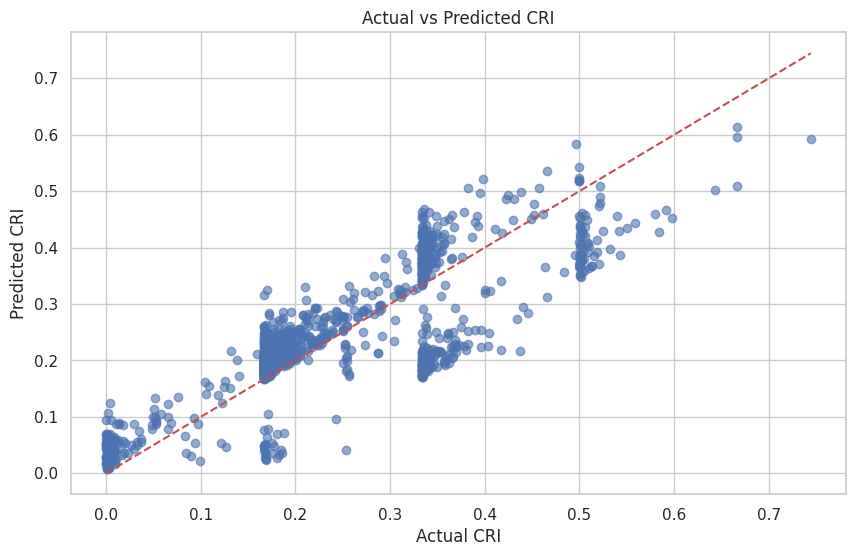

New Final Model Performance:
Mean Squared Error (MSE): 0.004680
R² Score: 0.6799


In [23]:
df = pd.read_excel("cleaned_dataset.xlsx")
new_final_features = [
    'corr_buyer_concentration', 
    'submission_period', 
    'decision_period', 
    'bid_priceUsd', 
    'tender_finalpriceUsd'
]
target = "cri"
# Drop rows with missing values in the selected features or target
filtered_data_new_final = df[new_final_features + [target]].dropna()

# Split data into features (X) and target (y)
X_new_final = filtered_data_new_final[new_final_features]
y_new_final = filtered_data_new_final[target]

# Split the dataset into training and testing sets
X_train_new_final, X_test_new_final, y_train_new_final, 
y_test_new_final = train_test_split(
    X_new_final, y_new_final, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor
rf_model_new_final = RandomForestRegressor(random_state=42)
rf_model_new_final.fit(X_train_new_final, y_train_new_final)

# Evaluate the new Random Forest model
y_pred_new_final = rf_model_new_final.predict(X_test_new_final)
new_final_mse = mean_squared_error(y_test_new_final, y_pred_new_final)
new_final_r2 = r2_score(y_test_new_final, y_pred_new_final)

# Visualize feature importance
feature_importances_new_final = rf_model_new_final.feature_importances_
sorted_indices_new_final = np.argsort(feature_importances_new_final)[::-1]
sorted_features_new_final = [new_final_features[i] 
                             for i in sorted_indices_new_final]
sorted_importances_new_final = 
feature_importances_new_final[sorted_indices_new_final]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_new_final, sorted_importances_new_final, 
         align='center')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in New Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_new_final, y_pred_new_final, alpha=0.6)
plt.plot([y_test_new_final.min(), y_test_new_final.max()], 
         [y_test_new_final.min(), y_test_new_final.max()], 'r--')
plt.xlabel("Actual CRI")
plt.ylabel("Predicted CRI")
plt.title("Actual vs Predicted CRI")
plt.show()

# Display model performance
print(f"New Final Model Performance:")
print(f"Mean Squared Error (MSE): {new_final_mse:.6f}")
print(f"R² Score: {new_final_r2:.4f}")

DecisionTreeRegressor(max_depth=3, random_state=42)

<Figure size 2000x1000 with 0 Axes>

[Text(0.5, 0.875, 'decision_period <= 63.5\nsquared_error = 0.015\nsamples = 5743\nvalue = 0.232'),
 Text(0.25, 0.625, 'submission_period <= 41.5\nsquared_error = 0.01\nsamples = 1245\nvalue = 0.374'),
 Text(0.125, 0.375, 'corr_buyer_concentration <= 0.287\nsquared_error = 0.007\nsamples = 1070\nvalue = 0.396'),
 Text(0.0625, 0.125, 'squared_error = 0.006\nsamples = 974\nvalue = 0.388'),
 Text(0.1875, 0.125, 'squared_error = 0.006\nsamples = 96\nvalue = 0.479'),
 Text(0.375, 0.375, 'submission_period <= 201.0\nsquared_error = 0.009\nsamples = 175\nvalue = 0.235'),
 Text(0.3125, 0.125, 'squared_error = 0.006\nsamples = 166\nvalue = 0.221'),
 Text(0.4375, 0.125, 'squared_error = 0.006\nsamples = 9\nvalue = 0.478'),
 Text(0.75, 0.625, 'submission_period <= 41.5\nsquared_error = 0.009\nsamples = 4498\nvalue = 0.192'),
 Text(0.625, 0.375, 'corr_buyer_concentration <= 0.244\nsquared_error = 0.005\nsamples = 3639\nvalue = 0.217'),
 Text(0.5625, 0.125, 'squared_error = 0.004\nsamples = 3023\nv

Text(0.5, 1.0, 'Decision Tree for Predicting CRI')

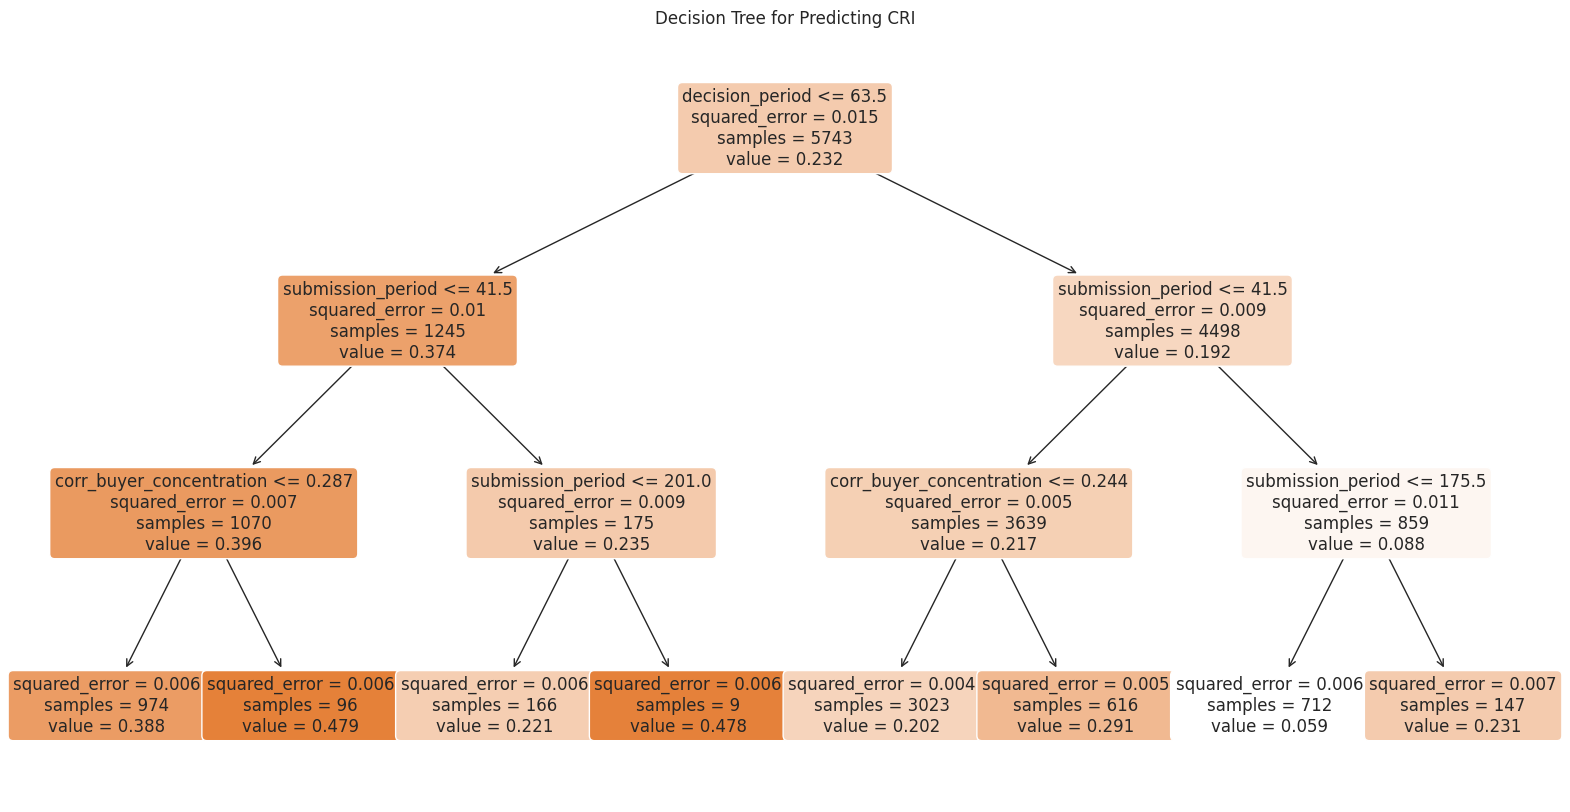

New Final Model Performance:
Mean Squared Error (MSE): 0.004680
R^2 Score: 0.6799


In [24]:
# Train a single Decision Tree for visualization purposes
tree_model_new_final = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model_new_final.fit(X_train_new_final, y_train_new_final)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model_new_final,
    feature_names=new_final_features,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree for Predicting CRI")
plt.show()

# Display the updated performance
print(f"New Final Model Performance:")
print(f"Mean Squared Error (MSE): {new_final_mse:.6f}")
print(f"R^2 Score: {new_final_r2:.4f}")

### 5.4 Neural Network Mode

We included some safeguards to ensure our model didn't just memorize patterns but actually learned to spot corruption risks (randomly ignoring some information during training). We tested the model by having it analyze a large set of contracts. The results showed it was moderately successful - it could explain about 58% of what makes a contract risky. While imperfect, it's a valuable tool for initial screening, with an average error rate of about 7.86% when predicting corruption risk. 

Epoch 1/100


/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0342 - val_loss: 0.0108
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0127 - val_loss: 0.0100
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0115 - val_loss: 0.0092
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0106 - val_loss: 0.0089
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0106 - val_loss: 0.0087
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0095 - val_loss: 0.0085
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0090 - val_loss: 0.0081
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0091 - val_loss: 0.0078
Epoch 9/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0089 - val_loss: 0.0079
Epoch 10/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0090 - val_loss: 0.0078
Epoch 11/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0084 - val_loss: 0.0076
Epoch 12/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

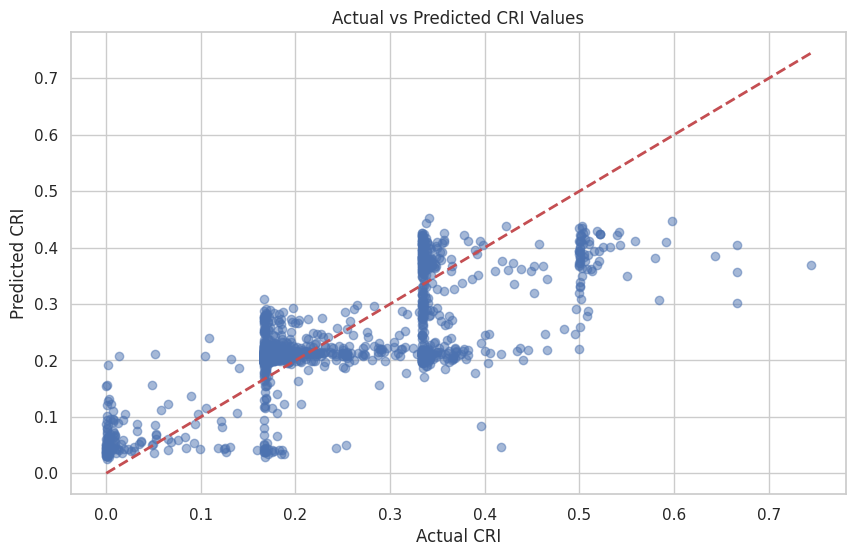

In [26]:
# First, we import all the libraries we'll need for our neural network

class SimpleNeuralNetwork:
   def __init__(self):
       # When we create a new neural network, we set up a scaler to 
       #normalize our data
       # Think of this like converting different units 
       #(dollars, days, years) to a common scale
       self.scaler = StandardScaler()
       self.model = None
       
   def prepare_data(self, df):
       # These are the key features we think might help predict corruption
       # Like a detective looking at specific clues in each case
       features = [
           'tender_year', 
           # When did this happen?
           'tender_description_length', 
           # How detailed was the contract description?
           'bid_priceUsd',            
           # What was the bid price?
           'tender_finalpriceUsd',     
           # What was the final price?
           'submission_period',         
           # How long did companies have to submit bids?
           'decision_period'          
           # How long did it take to make a decision?
       ]
       
       # Fill in any missing data with the median value for that feature
       # Like making an educated guess for missing information
       X = df[features].fillna(df[features].median())
       
       # Scale all our features to be on the same scale
       # This helps the neural network learn more effectively
       if self.training:
           X = self.scaler.fit_transform(X)
       else:
           X = self.scaler.transform(X)
           
       return X
   
   def create_model(self, input_dim):
       # Here we build our neural network layer by layer
       # Think of each layer as a level of increasingly sophisticated 
       #pattern recognition
       model = tf.keras.Sequential([
           # First layer: 64 neurons, looking for basic patterns
           tf.keras.layers.Dense(64, activation='relu', 
                                 input_dim=input_dim),
           tf.keras.layers.Dropout(0.2),  
           # Randomly ignore 20% of neurons to prevent over-reliance
           
           # Second layer: 32 neurons, finding more complex patterns
           tf.keras.layers.Dense(32, activation='relu'),
           tf.keras.layers.Dropout(0.1),  
           # Randomly ignore 10% of neurons
           
           # Third layer: 16 neurons, identifying high-level patterns
           tf.keras.layers.Dense(16, activation='relu'),
           
           # Output layer: Single neuron predicting corruption risk
           tf.keras.layers.Dense(1)
       ])
       
       # Set up the model to minimize prediction errors
       model.compile(optimizer='adam', loss='mse')
       return model
   
   def fit(self, df, y):
       # Prepare our data for training
       self.training = True
       X = self.prepare_data(df)
       self.training = False
       
       # Create our neural network
       self.model = self.create_model(X.shape[1])
       
       # Set up early stopping to prevent overtraining
       # Like knowing when to stop studying 
       #because you're not improving anymore
       early_stopping = tf.keras.callbacks.EarlyStopping(
           monitor='val_loss',
           patience=10,
           restore_best_weights=True
       )
       
       # Train the model, showing progress as we go
       history = self.model.fit(
           X, y,
           epochs=100,           # Maximum number of training rounds
           batch_size=32,        # Look at 32 cases at a time
           validation_split=0.2,  # Use 20% of data to check progress
           callbacks=[early_stopping],
           verbose=1
       )
       
       return history
   
   def predict(self, df):
       # Use our trained model to make predictions on new data
       X = self.prepare_data(df)
       return self.model.predict(X, verbose=0).flatten()
   
   def evaluate(self, test_df, y_test):
       # Make predictions on our test data
       predictions = self.predict(test_df)
       
       # Calculate how well our model performed
       mse = mean_squared_error(y_test, predictions) 
       # Average squared prediction error
       rmse = np.sqrt(mse)                          
       # More interpretable error measure
       r2 = r2_score(y_test, predictions)            
       # How much variation we explain (0-1)
       
       # Print out our performance metrics
       print("\nModel Performance Metrics:")
       print(f"Mean Squared Error: {mse:.4f}")
       print(f"Root Mean Squared Error: {rmse:.4f}")
       print(f"R² Score: {r2:.4f}")
       
       # Create a visual plot of our predictions vs actual values
       plt.figure(figsize=(10, 6))
       plt.scatter(y_test, predictions, alpha=0.5)
       plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2)
       plt.xlabel('Actual CRI')
       plt.ylabel('Predicted CRI')
       plt.title('Actual vs Predicted CRI Values')
       plt.show()

# Now we actually run our program:

# Load our procurement data
df = pd.read_excel('/home/jovyan/_shared_/finalproject/cleaned_dataset.xlsx', engine='openpyxl')

# Remove any cases where we don't know the corruption risk index
df = df.dropna(subset=['cri'])

# Split our data into training (80%) and testing (20%) sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
y_train = train_df['cri']
y_test = test_df['cri']

# Create and train our neural network
model = SimpleNeuralNetwork()
history = model.fit(train_df, y_train)

# See how well our model performs
model.evaluate(test_df, y_test)

## 6. Performance Evaluation

The performance evaluation of the models relied on R-squared to assess predictive capabilities. This metric was selected for its ability to quantify the proportion of variance in the target variable (CRI) explained by each model, offering a solid basis for comparing performance across both linear and non-linear relationships. It also serves as a valuable indicator of overfitting, as it effectively detects when the R-squared on training data is significantly higher than on test data. 
 
The Linear Regression model, with an R-squared of 0.067, could not account for the non-linear relationships in the data. Gradient Boosting Regressor improved on this, achieving an R-squared of 0.37, but it fell short of the Neural Network, which reached 0.57. Gradient Boosting's performance could be enhanced through better hyperparameter tuning, such as optimizing the number of estimators, learning rate, and tree depth. 
 
Unsupervised learning with K-Means clustering added value by identifying risk patterns within the dataset, complementing the supervised models. Although Random Forest stood out with the highest R-squared of 0.68, its interpretability makes it more suitable for exploratory analysis than for predictive tasks. While the Gradient Boosting Regressor remains a viable secondary option for predictive analysis if future improvements are implemented, the Neural Network emerges as the most promising model for accurately predicting corruption risk. 


## 7. Limitations

RFE was used before establishing the linear regression to rank features based on their predictive power. While RFE identified significant predictors, it was ineffective due to including derived features like corr_singleb and corr_subm, which are directly tied to CRI. This highlights the importance of preprocessing and excluding such features before applying RFE to prevent inflating performance metrics. The linear regression model produced a low R-squared, indicating that the selected features explain only a tiny proportion of the variance in CRI. This suggests that the relationship between the predictors and CRI might be too complex for a linear model to capture effectively. This limitation was addressed by implementing a Gradient Boosting Regressor, which yielded improved performance, highlighting the need for linear regression in capturing non-linear relationships. The lack of extensive validation for the Gradient Boosting Regressor may result in overfitting. Future work should refine the feature selection process by excluding derived variables and incorporating methods such as SHAP values. 
 
One limitation of K-means is its reliance on Euclidean distance, which assumes spherical clusters of similar density. The clusters may not naturally conform to this shape or distribution in our data, especially given the observed overlap and outliers. The CRI and tender price may have non-linear relationships, which K-means can only effectively address with proper normalization or feature engineering. To improve the model, we may consider using clustering methods like DBSCAN, which handles non-linear cluster shapes and noise more robustly, or GMM, which can model clusters with different shapes and densities. Applying dimensionality reduction (PCA) or transforming variables to account for skewness and scale may yield better clustering results. Explicitly validating clusters against labeled data or domain-specific thresholds can also refine the analysis. 
 
Despite its high predictive performance, the Random Forest model has a few limitations. Its dependence on time-related variables may limit the model’s generalizability in other tender scenarios. These variables could be proxies for broader operational inefficiencies, making validating their relevance in different contexts essential before applying the model universally. Pricing variables have comparatively low significance, which raises the possibility that the current dataset does not adequately reflect market dynamics. Lastly, the importance of certain variables may be inflated by possible multicollinearity among features (buyer concentration and submission timing), underscoring the necessity of further diagnostic tests like VIF analysis. Organizations should initially concentrate on streamlining the decision and submission periods. Since these are the most critical indicators of CRI, corruption may be reduced by increasing process effectiveness. For instance, there may be benefits to automating decision-making processes or reducing bureaucracy. Sensitivity analyses on feature importance can ensure the model stays relevant when business circumstances change, facilitating well-informed decision-making. 
 
The current model faces several constraints that impact its effectiveness. The reliance on basic procurement features overlooks crucial information, while the absence of complex bidder interaction patterns and temporal market dynamics limits the model's ability to capture sophisticated corruption schemes. The model's performance shows weaknesses, particularly its underestimation of high-risk scenarios (CRI > 0.4) and its accuracy (R² = 0.5834). The model makes oversimplified risk categorizations rather than nuanced individual assessments. Furthermore, the assumption of linear relationships between features and corruption risk, combined with limited explainability in the decision-making process, makes it unsuitable as a standalone decision-making tool for high-stakes situations. To enhance the model's performance, several key improvements should be implemented. The primary focus should be expanding the feature set to include bidder information, market conditions, and sector-specific risk factors. The model architecture could be upgraded to incorporate more sophisticated structures, such as LSTM networks or attention mechanisms for capturing complex patterns in high-risk cases. Additionally, ensemble methods combining multiple model types could provide more robust predictions. Establishing standardized data collection protocols and developing advanced feature engineering pipelines would ensure consistent input quality. Regular model retraining procedures and cross-jurisdictional testing protocols should also be established to maintain the model's effectiveness across different procurement scenarios.

## 8. Conclusions

The findings of this analysis underline the role that predictive modeling can play in identifying corruption risks in public procurement. The utilized models spotted non-linear relationships that indicate procurement irregularities and corruption risk by examining critical predictors such as decision and submission periods, buyer concentration, and procurement requirements. Insights from Random Forest suggest that policies should focus on reducing inefficiencies and implementing automated decision-making processes. The Gradient Boosting Regressing model can be used further to simulate the effects of policy changes on corruption risk, such as adjusting thresholds for submission periods or introducing stricter evaluation criteria that can be tested to predict their impact on CRI scores before implementation. Neural Networks can be integrated into real-time predictive frameworks to detect high-risk tenders that exhibit non-linear risk patterns, which can be highlighted for additional review. 
 
These findings can guide resource allocation for further investigation into procurement anomalies and strengthen anti-corruption efforts. The sensitivity of CRI to changing business conditions highlights the need for frequent dataset updates and sensitivity analyses to ensure the model remains relevant and accurate over time. It is also important to incorporate additional features like financial histories such as tax compliance records of suppliers and buyers. By combining these recommendations and measures, transparency and anti-corruption practices can be strengthened in procurement processes. 


## 9. References

Reference of the data : <br> https://www.sciencedirect.com/science/article/pii/S2352340924003810?via%3Dihub&__cf_chl_tk=NeNAd4zlndgwD.MZbK8qEcPNBZqw6zuDlBJGx4kNUZU-1728319313-0.0.1.1-9599

In [27]:
import json

def count_words_in_markdown_cells(notebook_path):
    """
    Counts the number of words in Markdown cells of a Jupyter Notebook.

    Parameters:
        notebook_path (str): Path to the Jupyter Notebook file (.ipynb).

    Returns:
        int: Total word count in Markdown cells.
    """
    with open(notebook_path, 'r', encoding='utf-8') as notebook_file:
        notebook_data = json.load(notebook_file)

    word_count = 0

    # Iterate through all cells in the notebook
    for cell in notebook_data.get('cells', []):
        # Check if the cell type is 'markdown'
        if cell.get('cell_type') == 'markdown':
            content = "".join(cell.get('source', []))
            word_count += len(content.split())

    return word_count - 551 #wordcount for title, header, table of contents, 
    #references, GenAI usage, and contributions

notebook_path = ' MSIN0143-2024-GROUP-G2.ipynb'
print("Total word count in Markdown cells:", count_words_in_markdown_cells(notebook_path))


Total word count in Markdown cells: 1852
